In [1]:
import matplotlib.pyplot as plt

from keras.layers import Embedding, Dense, Flatten
from keras.models import Sequential
from keras.preprocessing.sequence import pad_sequences
from keras.preprocessing.text import Tokenizer
from keras.utils import to_categorical

Using TensorFlow backend.


In [2]:
texts, labels = [], []

with open('data.txt') as f:
    for line in f:
        text, label = line.strip().split(' ENDABSTRACTS ')
        
        text = text.replace(' ENDABSTRACT ', '. ')
        text = text.replace(' ENDTITLE ', '. ')
        text = text.replace(' ENDTITLES ', '. ')
        
        if label == 'CORE':
            label = 1
        elif label == 'Non-CORE':
            label = 0
        elif label == 'Rejected':
            label = -1
        
        texts.append(text)
        labels.append(label)

In [3]:
tokenizer = Tokenizer(num_words=10000)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)
data = pad_sequences(sequences, maxlen=100)

In [4]:
labels = to_categorical(labels, num_classes=3)

In [5]:
training_samples = 3 * len(data) // 5
validation_samples = len(data) // 5

In [6]:
x_train = data[:training_samples]
y_train = labels[:training_samples]
x_val = data[training_samples:training_samples + validation_samples]
y_val = labels[training_samples:training_samples + validation_samples]
x_test = data[training_samples + validation_samples:]
y_test = labels[training_samples + validation_samples:]

In [7]:
model = Sequential()
model.add(Embedding(10000, 100, input_length=100))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(3, activation='softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 100, 100)          1000000   
_________________________________________________________________
flatten_1 (Flatten)          (None, 10000)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                320032    
_________________________________________________________________
dense_2 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_3 (Dense)              (None, 3)                 99        
Total params: 1,321,187
Trainable params: 1,321,187
Non-trainable params: 0
_________________________________________________________________


In [8]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['acc'])

In [9]:
history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_val, y_val))

Train on 21418 samples, validate on 7139 samples
Epoch 1/10
21418/21418 [==============================] - 1s - loss: 0.3640 - acc: 0.8847 - val_loss: 0.3175 - val_acc: 0.8966
Epoch 2/10
21418/21418 [==============================] - 1s - loss: 0.1824 - acc: 0.9331 - val_loss: 0.3881 - val_acc: 0.8826
Epoch 3/10
21418/21418 [==============================] - 1s - loss: 0.0675 - acc: 0.9787 - val_loss: 0.5485 - val_acc: 0.8850
Epoch 4/10
21418/21418 [==============================] - 1s - loss: 0.0394 - acc: 0.9894 - val_loss: 0.6022 - val_acc: 0.8780
Epoch 5/10
21418/21418 [==============================] - 1s - loss: 0.0254 - acc: 0.9925 - val_loss: 0.7925 - val_acc: 0.8724
Epoch 6/10
21418/21418 [==============================] - 1s - loss: 0.0164 - acc: 0.9944 - val_loss: 0.8473 - val_acc: 0.8553
Epoch 7/10
21418/21418 [==============================] - 1s - loss: 0.0123 - acc: 0.9945 - val_loss: 1.0869 - val_acc: 0.8430
Epoch 8/10
21418/21418 [==============================] - 1s -

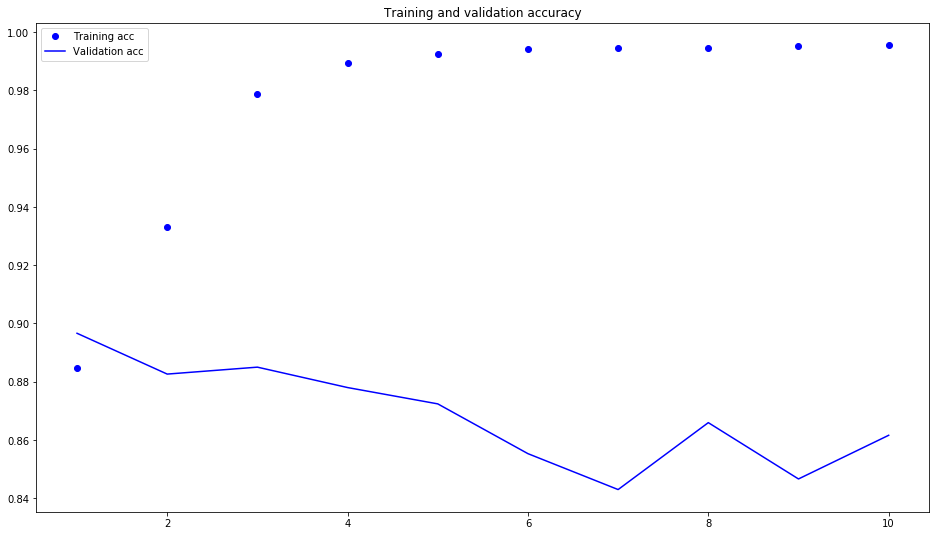

In [10]:
acc = history.history['acc']
val_acc = history.history['val_acc']

epochs = range(1, len(acc) + 1)

plt.figure(figsize=(16, 9))
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.show()

In [11]:
_, acc = model.evaluate(x_test, y_test)

5024/7141 [====================>.........] - ETA: 0s

In [12]:
acc

0.86612519255006304